In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Data

Read in the three files: clients.csv, loans.csv, payments.csv. These files are related by the following:
1. The clients file is the parent of the loans file. Each client can have multiple distinct loans. The client_id column links the two files
2. The loans file is the child of the clients file and the parent of the payments file. Each loan can have multiple distinct payments associated with it. The loan_id column links the two files.

With the above datasets, answer the following questions. Show the steps taken to produce your final answer.

# Section 1 Questions

1. Give the 5 client IDs with the highest mean payment amount
2. How many unique loans have been given out to clients who joined prior to 2001?
3. What is the mean number of payments missed by clients with a credit score of less than 700 and who have missed more than 50 payments?

In [5]:
clients = pd.read_csv("clients.csv")
loans = pd.read_csv("loans.csv")
payments = pd.read_csv("payments.csv")

In [6]:
clients.head()

,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621


In [7]:
loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [8]:
payments.head()

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1


In [9]:
### Merge three dataset based on the common columns
# first merge: clients & loans on client_id
mrg1 = pd.merge(clients,loans,on="client_id",how="inner")
# second merge: mrg1 & payments on loan_id
df = pd.merge(mrg1,payments,on="loan_id",how="inner")
df.head()

,client_id,joined,income,credit_score,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,payment_amount,payment_date,missed
0,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2369,2002-05-31,1
1,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2439,2002-06-18,1
2,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2662,2002-06-29,0
3,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2268,2002-07-20,0
4,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2027,2002-07-31,1


In [10]:
# Question 1
Q1 = df[["client_id","payment_amount"]].groupby("client_id").mean().sort_values(by='payment_amount',ascending=False)
list(Q1.head(5).index)

[49545, 29841, 49624, 32885, 46109]

In [11]:
# Question 2
## dividing date into year, month and adding year to the dataset
b = np.array([x.split("-") for x in df.joined])
df["year"] = b[:,0]
print(df.dtypes)

## convert columns to int format
df["year"]=df["year"].astype(int)
##  clients who joined prior to 2001
clients2001 = df[df["year"]<2001]

print("\nNumber of unique loans: ",len(clients2001.loan_id.value_counts()))

client_id           int64
joined             object
income              int64
credit_score        int64
loan_type          object
loan_amount         int64
repaid              int64
loan_id             int64
loan_start         object
loan_end           object
rate              float64
payment_amount      int64
payment_date       object
missed              int64
year               object
dtype: object

Number of unique loans:  49


In [13]:
# Question 3
Q3 = df[["client_id","credit_score","missed"]]
df3 = Q3[Q3.credit_score<700].groupby("client_id").sum()
print("Thë answer is:", df3[df3.missed>50].missed.mean())

Thë answer is: 69.25


# Section 2 Questions

Create the following visualizations:
    
1. Create a histogram of the payment amounts. Briefly describe the distribution.
2. Produce a line plot the cumulative sum of the number of clients by year.
3. Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.

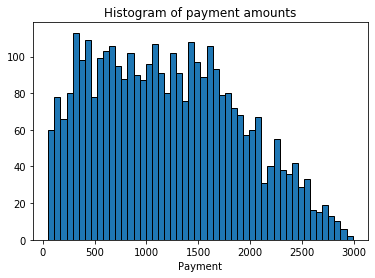

In [14]:
# Question 1
X = payments["payment_amount"]
plt.hist(X,bins=50, edgecolor="k")
# Add axis labels
plt.xlabel("Payment")
plt.title("Histogram of payment amounts");

{2000: 378, 2001: 254, 2002: 529, 2003: 166, 2004: 574, 2006: 312, 2007: 191, 2008: 158, 2009: 240, 2010: 159, 2011: 243, 2012: 101, 2013: 151}


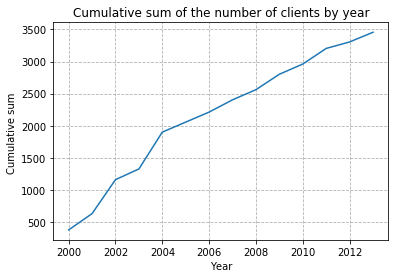

In [15]:
# Question 2
yearArr = df.sort_values(by='year')["year"]

# dictionary with the number of clients by year 
yearDic = dict()
for y in yearArr:
    yearDic[y]=yearDic.get(y,0)+1

print(yearDic)

plt.plot(list(yearDic.keys()),np.cumsum(list(yearDic.values())))
plt.grid(linestyle="--")

# Add axis labels
plt.xlabel("Year")
plt.ylabel("Cumulative sum ");
plt.title("Cumulative sum of the number of clients by year");

In [16]:
# Question 3

## dividing date into year, month and adding them to the dataset as three columns 
b = np.array([x.split("-") for x in payments.payment_date])
payments["month"] = b[:,1]
payments["year"] = b[:,0]

## convert columns to int format
payments["month"] = payments["month"].astype(int)
payments["year"] = payments["year"].astype(int)

In [17]:
dat1 = payments[["missed","month","year"]].groupby(["year","month"]).sum().reset_index()
print(dat1.head())
dat2 = payments[["missed","year"]].groupby(["year"]).sum().reset_index()
print()
print(dat2.head())
dat = pd.merge(dat1,dat2,on="year",how="inner")
print()
print(dat.head())
dat = dat[dat.month==11]
dat["percentage"] = dat.missed_x/dat.missed_y

   year  month  missed
0  2000      3       0
1  2000      4       1
2  2000      5       2
3  2000      6       2
4  2000      7       5

   year  missed
0  2000      50
1  2001      94
2  2002     130
3  2003     133
4  2004     127

   year  month  missed_x  missed_y
0  2000      3         0        50
1  2000      4         1        50
2  2000      5         2        50
3  2000      6         2        50
4  2000      7         5        50


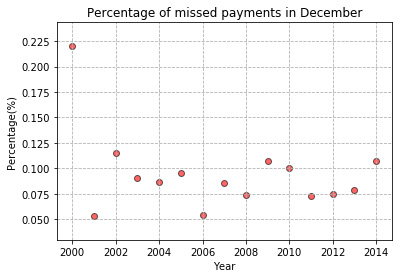

In [18]:
plt.scatter(dat["year"], dat["percentage"],color="r",alpha=0.6,edgecolor="k")
plt.grid(linestyle="--")

# Add axis labels
plt.xlabel("Year")
plt.ylabel("Percentage(%)");
plt.title("Percentage of missed payments in December");

# Section 3 - Modelling

Create a model that will predict whether a person does or does not have diabetes. Use the diabetes.csv dataset. The target column in the dataset is "Outcome". Assume no features leak information about the target.

Your solution should include the below. You may use whichever python libraries you wish to complete the task:
1. Feature engineering
2. Model fitting and performance evaluation
3. A function that takes as arguments: a model, train data, test data, and returns the model's predictions on the test data
4. A function that takes a set of predictions and true values and that validates the predictions using appropriate metrics
5. Anything else you feel is necessary for modelling or improving the performance of your model


__This exercise is intended for you to show your proficiency in machine learning, understanding of the various techniques that can be employed to improve the performance of a model, and your ability to implement those techniques. Please, therefore, show your working at all times. You will be judged more for the above than for the performance of the final model your produce.__

In [80]:
diabetes = pd.read_csv("test_diabetes.csv",delimiter=";")
# dataset size
print(diabetes.shape)

diabetes.dtypes

(768, 9)


Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                      object
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                      object
dtype: object

In [81]:
# target variable distribution
diabetes['Outcome'].value_counts()

0    339
1    177
N    161
Y     91
Name: Outcome, dtype: int64

In [82]:
# object to integer
diabetes['Outcome'] = diabetes['Outcome'].map({'0': 0, "1": 1,'N': "2", 'Y': "3"})
diabetes['Outcome'].value_counts()

0    339
1    177
2    161
3     91
Name: Outcome, dtype: int64

In [83]:
print(diabetes["Insulin"].value_counts())
# replace Zero with 0 
diabetes[diabetes["Insulin"]=="Zero"] = 0

Zero    346
105      11
130       8
140       8
94        7
       ... 
142       1
127       1
84        1
235       1
255       1
Name: Insulin, Length: 182, dtype: int64


In [84]:
# missing values
diabetes.isna().sum()

Pregnancies                 19
Glucose                     19
BloodPressure               19
SkinThickness               10
Insulin                     51
BMI                         25
DiabetesPedigreeFunction    24
Age                         32
Outcome                      0
dtype: int64

In [85]:
# convert columns to float formats
diabetes["Insulin"] = diabetes["Insulin"].astype(float)

In [86]:
# replace nan values with average of columns
diabetes = diabetes.fillna(diabetes.mean())
# missing values
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [87]:
# Outlier detection 
def detect_outliers(df,n,features):
    """
    Takes a dataframe of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [88]:
## detecting outliers in the dataframe
from collections import Counter
ColNames = list(diabetes.columns)[:-1]
Outliers_to_drop = detect_outliers(diabetes,1, ColNames)
indexOutliers = list(diabetes.iloc[Outliers_to_drop,:].index)
print(indexOutliers)
diabetes = diabetes.drop(diabetes.index[indexOutliers])

[54, 111, 152, 186, 231, 243, 248, 259, 270, 375, 459, 519, 584, 612, 695, 715, 370]


In [89]:
## correlation between features using Pearson method
corr = diabetes.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1,0.575116,0.575419,0.473392,0.364006,0.523065,0.390827,0.636395
Glucose,0.575116,1,0.899469,0.81371,0.740509,0.881225,0.683974,0.797193
BloodPressure,0.575419,0.899469,1,0.823713,0.661905,0.921744,0.683772,0.812849
SkinThickness,0.473392,0.81371,0.823713,1,0.651232,0.890859,0.657019,0.7208
Insulin,0.364006,0.740509,0.661905,0.651232,1,0.680769,0.501177,0.603317
BMI,0.523065,0.881225,0.921744,0.890859,0.680769,1,0.684057,0.787806
DiabetesPedigreeFunction,0.390827,0.683974,0.683772,0.657019,0.501177,0.684057,1,0.600081
Age,0.636395,0.797193,0.812849,0.7208,0.603317,0.787806,0.600081,1


In [90]:
## remove BMI from dataset to avoid multicolanarity
diabetes = diabetes.drop(['BMI',"BloodPressure","Glucose"], axis=1)

In [91]:
## correlation between features using Pearson method
corr = diabetes.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
Pregnancies,1,0.473392,0.364006,0.390827,0.636395
SkinThickness,0.473392,1,0.651232,0.657019,0.7208
Insulin,0.364006,0.651232,1,0.501177,0.603317
DiabetesPedigreeFunction,0.390827,0.657019,0.501177,1,0.600081
Age,0.636395,0.7208,0.603317,0.600081,1


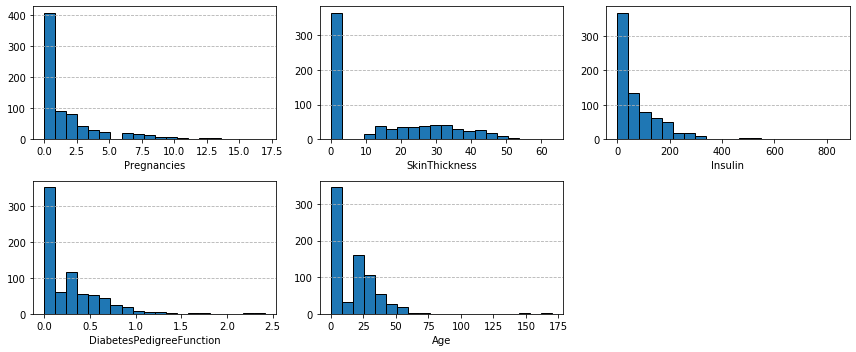

In [92]:
## histogram
ColNames = list(diabetes.columns[:-1])

plt.figure(figsize=(12,5))
i = 1
for ColName in ColNames:
    plt.subplot(2,3 , i)
    plt.hist(diabetes[ColName], edgecolor ="k", bins=20)
    plt.xlabel(ColName)
    plt.grid(linestyle="--", axis="y")
    plt.tight_layout()
    i+=1

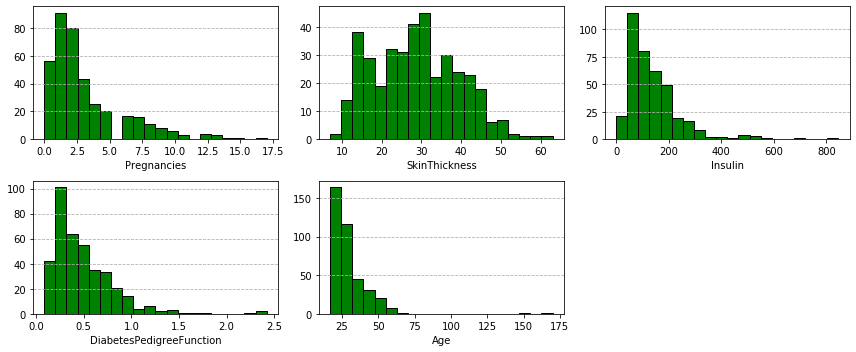

In [93]:
## data cleaning by removing SkinThickness == 0
diabetes = diabetes[diabetes["SkinThickness"]!=0]

## histogram
ColNames = list(diabetes.columns[:-1])

plt.figure(figsize=(12,5))
i = 1
for ColName in ColNames:
    plt.subplot(2,3 , i)
    plt.hist(diabetes[ColName], edgecolor ="k", bins=20, color="g")
    plt.xlabel(ColName)
    plt.grid(linestyle="--", axis="y")
    plt.tight_layout()
    i+=1

#### Train Random forest, Logestic regression and KNN for classification problem

In [94]:
print(diabetes.Outcome.value_counts())      

0    184
1     82
2     81
3     39
Name: Outcome, dtype: int64


In [95]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [96]:
diabetes.dtypes

Pregnancies                 float64
SkinThickness               float64
Insulin                     float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                      object
dtype: object

In [102]:
y = diabetes.Outcome.astype(int).values
X = diabetes.drop("Outcome",axis=1).values
normX = (X - X.mean())/X.std()

In [126]:
## Split our data
X_train, X_test, y_train, y_test = train_test_split(normX, y, test_size=0.33, random_state=1)

13


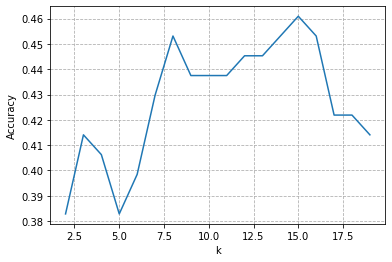

In [127]:
## finding the optimal k for KNN 
accuracy=[]
for k in range(2,20):
    # Fit Knn classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model using the training sets
    knn.fit(X_train,y_train)
    ind=accuracy_score(y_test, knn.predict(X_test))
    accuracy.append(ind)

opt_k=np.where(accuracy==np.max(accuracy))[0][0]
print(opt_k)
plt.plot(range(2,20),accuracy)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(linestyle="--");

In [128]:
classifiers = [
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(multi_class='multinomial',solver='lbfgs'),
    KNeighborsClassifier(opt_k)]

classifiers_names=["RandomForest: \n",
                   "Logistic Regression: \n",
                   "K Nearest Neighbors: \n"]

In [129]:
i=0
for classifier in classifiers:
    model = classifier
    model.fit(X_train,y_train)
    # print(classifier)
    class_rep = classification_report(y_test, model.predict(X_test))
    print(classifiers_names[i],class_rep)
    print("---------------------------------------------------------")
    i=i+1

RandomForest: 
               precision    recall  f1-score   support

           0       0.55      0.84      0.67        58
           1       0.44      0.41      0.42        27
           2       0.22      0.07      0.10        30
           3       0.60      0.23      0.33        13

    accuracy                           0.51       128
   macro avg       0.45      0.39      0.38       128
weighted avg       0.46      0.51      0.45       128

---------------------------------------------------------
Logistic Regression: 
               precision    recall  f1-score   support

           0       0.48      0.97      0.64        58
           1       0.42      0.19      0.26        27
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        13

    accuracy                           0.48       128
   macro avg       0.22      0.29      0.23       128
weighted avg       0.31      0.48      0.35       128

---------------------------------

C:\Users\Meghdad\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Meghdad\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
## Using oversampling to improve the model performance

In [150]:
from imblearn.over_sampling import RandomOverSampler, ADASYN
from collections import Counter

In [151]:
# resampling X, y
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
Counter(y_ros)

Counter({0: 126, 1: 126, 2: 126, 3: 126})

In [152]:
i=0
for classifier in classifiers:
    model = classifier
    model.fit(X_ros, y_ros)
    # print(classifier)
    class_rep = classification_report(y_test, model.predict(X_test))
    print(classifiers_names[i],class_rep)
    print("---------------------------------------------------------")
    i=i+1

RandomForest: 
               precision    recall  f1-score   support

           0       0.56      0.67      0.61        58
           1       0.41      0.41      0.41        27
           2       0.24      0.17      0.20        30
           3       0.30      0.23      0.26        13

    accuracy                           0.45       128
   macro avg       0.38      0.37      0.37       128
weighted avg       0.42      0.45      0.43       128

---------------------------------------------------------
Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.40      0.46        58
           1       0.32      0.26      0.29        27
           2       0.16      0.17      0.16        30
           3       0.12      0.31      0.18        13

    accuracy                           0.30       128
   macro avg       0.29      0.28      0.27       128
weighted avg       0.36      0.30      0.32       128

---------------------------------